# ***Imports***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

from keras.layers import Dense
from keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical

pd.options.display.max_rows = 0
pd.options.display.max_columns = 0

# ***Data reading***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_name = '/content/drive/Shareddrives/DS4A/Credit Risk/Code/Data/Modelos_2015.csv'
data = pd.read_csv(file_name)

In [ ]:
data.shape

(2233083, 30)

In [ ]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
data.head()

,int_rate,last_fico,loan_amnt,dti,installment,max_bal_bc,mo_sin_old_rev_tl_op,mort_acc,pct_tl_nvr_dlq,percent_bc_gt_75,revol_util,tot_cur_bal,tot_hi_cred_lim,total_acc,annual_inc,bc_open_to_buy,delinq_amnt,inq_last_6mths,addr_state,application_type,emp_length,emp_title,grade,home_ownership,initial_list_status,purpose,term,verification_status,loan_status
0,7.97,692.0,12000.0,27.74,375.88,7117.0,255.0,0.0,100.0,0.0,37.0,30502.0,57180.0,16.0,42000.0,7144.0,0.0,0.0,CA,Individual,10+ years,associate,A,OWN,w,debt_consolidation,36 months,Source Verified,Fully Paid
1,11.99,672.0,32000.0,12.35,1062.71,14049.0,144.0,3.0,94.9,0.0,34.1,405751.0,527034.0,42.0,155000.0,81313.0,0.0,1.0,NJ,Individual,10+ years,Nurse,B,MORTGAGE,w,credit_card,36 months,Source Verified,Current
2,15.05,767.0,40000.0,31.11,952.65,10609.0,185.0,4.0,100.0,0.0,20.7,227506.0,367745.0,26.0,120000.0,51211.0,0.0,0.0,TX,Individual,9 years,Driver,C,MORTGAGE,w,debt_consolidation,60 months,Verified,Current
3,7.97,672.0,16000.0,15.94,501.17,2959.0,207.0,0.0,78.9,100.0,57.7,128572.0,125018.0,20.0,79077.0,336.0,0.0,0.0,VA,Individual,5 years,Senior Investigator,A,RENT,w,debt_consolidation,36 months,Not Verified,Current
4,7.21,707.0,33000.0,19.06,1022.12,9317.0,133.0,2.0,100.0,0.0,16.1,244459.0,404510.0,52.0,107000.0,65368.0,0.0,0.0,TX,Joint App,< 1 year,Registered Nurse,A,MORTGAGE,w,debt_consolidation,36 months,Verified,Late (31-120 days)


In [ ]:
data.isnull().sum()

int_rate                0
last_fico               0
loan_amnt               0
dti                     0
installment             0
max_bal_bc              0
mo_sin_old_rev_tl_op    0
mort_acc                0
pct_tl_nvr_dlq          0
percent_bc_gt_75        0
revol_util              0
tot_cur_bal             0
                       ..
inq_last_6mths          0
addr_state              0
application_type        0
emp_length              0
emp_title               0
grade                   0
home_ownership          0
initial_list_status     0
purpose                 0
term                    0
verification_status     0
loan_status             0
Length: 29, dtype: int64

In [ ]:
data['loan_status'].value_counts()

Current               1026252
Fully Paid             933437
Charged Off            242302
Late (31-120 days)      15986
In Grace Period          9934
Late (16-30 days)        2695
Issued                   2062
Default                   415
Name: loan_status, dtype: int64

In [ ]:
data.drop(data.loc[data['loan_status']=='Current'].index, inplace=True)
data.drop(data.loc[data['loan_status']=='Late (31-120 days)'].index, inplace=True)
data.drop(data.loc[data['loan_status']=='In Grace Period'].index, inplace=True)
data.drop(data.loc[data['loan_status']=='Late (16-30 days)'].index, inplace=True)
data.drop(data.loc[data['loan_status']=='Issued'].index, inplace=True)

In [ ]:
data['loan_status'].value_counts()

Fully Paid     933437
Charged Off    242302
Default           415
Name: loan_status, dtype: int64

In [ ]:
data.dtypes

int_rate                float64
last_fico               float64
loan_amnt               float64
dti                     float64
installment             float64
max_bal_bc              float64
mo_sin_old_rev_tl_op    float64
mort_acc                float64
pct_tl_nvr_dlq          float64
percent_bc_gt_75        float64
revol_util              float64
tot_cur_bal             float64
                         ...   
inq_last_6mths          float64
addr_state               object
application_type         object
emp_length               object
emp_title                object
grade                    object
home_ownership           object
initial_list_status      object
purpose                  object
term                     object
verification_status      object
loan_status              object
Length: 29, dtype: object

In [ ]:
data['purpose'].value_counts()

debt_consolidation    655593
credit_card           257793
home_improvement       84896
other                  80778
major_purchase         28426
medical                16180
car                    13079
small_business         11965
vacation                9613
moving                  8929
house                   8093
renewable_energy         800
wedding                    8
educational                1
Name: purpose, dtype: int64

In [ ]:
data.drop('addr_state', axis=1, inplace=True)
data.drop('emp_title', axis=1, inplace=True)
data.drop('initial_list_status', axis=1, inplace=True)

In [ ]:
data.drop(data.loc[data['purpose']=='renewable_energy'].index, inplace=True)
data.drop(data.loc[data['purpose']=='wedding'].index, inplace=True)
data.drop(data.loc[data['purpose']=='educational'].index, inplace=True)

In [ ]:
data.drop(data.loc[data['home_ownership']=='ANY'].index, inplace=True)
data.drop(data.loc[data['home_ownership']=='NONE'].index, inplace=True)

***********************************************************

In [ ]:
data = data[['last_fico','int_rate','annual_inc','loan_amnt','dti','grade','purpose','term','inq_last_6mths','loan_status']]

***************************************************************

In [ ]:
data = pd.get_dummies(data, columns=['term'], prefix="Term", drop_first=True)
data = pd.get_dummies(data, columns=['purpose'], prefix="Purpose", drop_first=True)
data = pd.get_dummies(data, columns=['grade'], prefix="Grade", drop_first=True)

In [ ]:
data['loan_status'].replace({'Fully Paid':1, 'Charged Off':0, 'Default':0}, inplace=True)

In [ ]:
data.dtypes

last_fico                     float64
int_rate                      float64
annual_inc                    float64
loan_amnt                     float64
dti                           float64
inq_last_6mths                float64
loan_status                     int64
Term_ 60 months                 uint8
Purpose_credit_card             uint8
Purpose_debt_consolidation      uint8
Purpose_home_improvement        uint8
Purpose_house                   uint8
Purpose_major_purchase          uint8
Purpose_medical                 uint8
Purpose_moving                  uint8
Purpose_other                   uint8
Purpose_small_business          uint8
Purpose_vacation                uint8
Grade_B                         uint8
Grade_C                         uint8
Grade_D                         uint8
Grade_E                         uint8
Grade_F                         uint8
Grade_G                         uint8
dtype: object

In [ ]:
data.shape

(1174168, 24)

# **Machine Learning**

In [ ]:
X = data.drop(['loan_status'], axis=1)
Y = data['loan_status']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
model = GaussianNB()

# Train and Predict
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

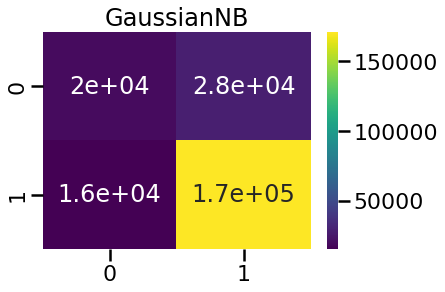

In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True, cmap='viridis')
plt.title('GaussianNB')
plt.show()

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.56      0.41      0.47     48239
           1       0.86      0.92      0.89    186595

    accuracy                           0.81    234834
   macro avg       0.71      0.66      0.68    234834
weighted avg       0.80      0.81      0.80    234834



In [ ]:
model2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

# Train and Predict
model2.fit(X_train, Y_train)
Y_pred2 = model2.predict(X_test)

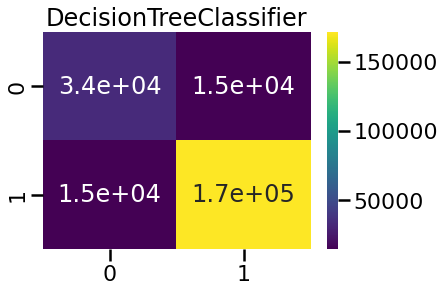

In [ ]:
cm = confusion_matrix(Y_test, Y_pred2)
sns.heatmap(cm, annot = True, cmap='viridis')
plt.title('DecisionTreeClassifier')
plt.show()

In [ ]:
print(classification_report(Y_test, Y_pred2))

              precision    recall  f1-score   support

           0       0.69      0.70      0.70     48239
           1       0.92      0.92      0.92    186595

    accuracy                           0.87    234834
   macro avg       0.81      0.81      0.81    234834
weighted avg       0.87      0.87      0.87    234834



In [ ]:
model3 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# Train and Predict
model3.fit(X_train, Y_train)
Y_pred3 = model3.predict(X_test)

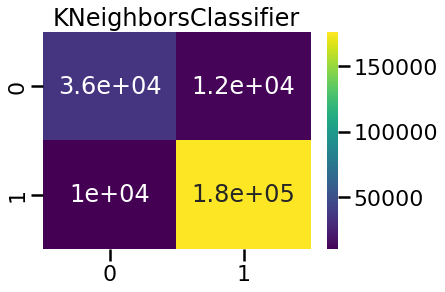

In [ ]:
cm = confusion_matrix(Y_test, Y_pred3)
sns.heatmap(cm, annot = True, cmap='viridis')
plt.title('KNeighborsClassifier')
plt.show()

In [ ]:
print(classification_report(Y_test, Y_pred3))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76     48239
           1       0.94      0.94      0.94    186595

    accuracy                           0.91    234834
   macro avg       0.86      0.85      0.85    234834
weighted avg       0.90      0.91      0.90    234834



In [ ]:
model4 = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)

# Train and Predict
model4.fit(X_train, Y_train)
Y_pred4 = model4.predict(X_test)

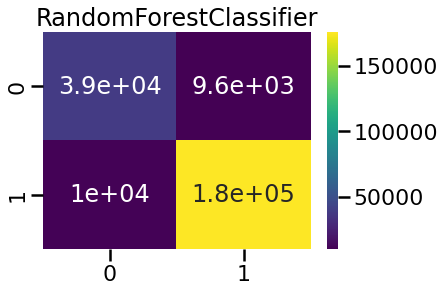

In [ ]:
cm = confusion_matrix(Y_test, Y_pred4)
sns.heatmap(cm, annot = True, cmap='viridis')
plt.title('RandomForestClassifier')
plt.show()

In [ ]:
print(classification_report(Y_test, Y_pred4))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79     48239
           1       0.95      0.94      0.95    186595

    accuracy                           0.91    234834
   macro avg       0.87      0.87      0.87    234834
weighted avg       0.92      0.91      0.91    234834



In [ ]:
model5 = LogisticRegression(random_state = 0)

# Train and Predict
model5.fit(X_train, Y_train)
Y_pred5 = model5.predict(X_test)

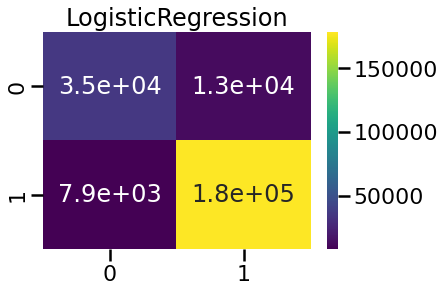

In [ ]:
cm = confusion_matrix(Y_test, Y_pred5)
sns.heatmap(cm, annot = True, cmap='viridis')
plt.title('LogisticRegression')
plt.show()

In [ ]:
print(classification_report(Y_test, Y_pred5))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78     48239
           1       0.93      0.96      0.95    186595

    accuracy                           0.91    234834
   macro avg       0.88      0.85      0.86    234834
weighted avg       0.91      0.91      0.91    234834



In [ ]:
model6 = LinearRegression()

# Train and Predict
model6.fit(X_train, Y_train)
Y_pred6 = model6.predict(X_test)

In [ ]:
def map_pred(val):
    if val > 0.5: return 1
    else: return 0

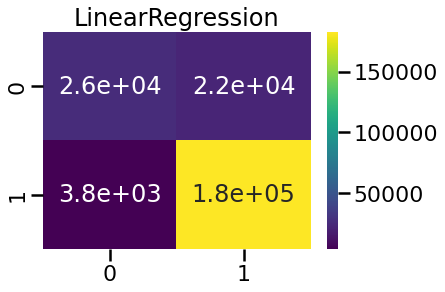

In [ ]:
cm = confusion_matrix(Y_test, [map_pred(i) for i in Y_pred6])
sns.heatmap(cm, annot = True, cmap='viridis')
plt.title('LinearRegression')
plt.show()

In [ ]:
print(classification_report(Y_test, [map_pred(i) for i in Y_pred6]))

              precision    recall  f1-score   support

           0       0.87      0.53      0.66     48239
           1       0.89      0.98      0.93    186595

    accuracy                           0.89    234834
   macro avg       0.88      0.76      0.80    234834
weighted avg       0.89      0.89      0.88    234834



# **Curva ROC**

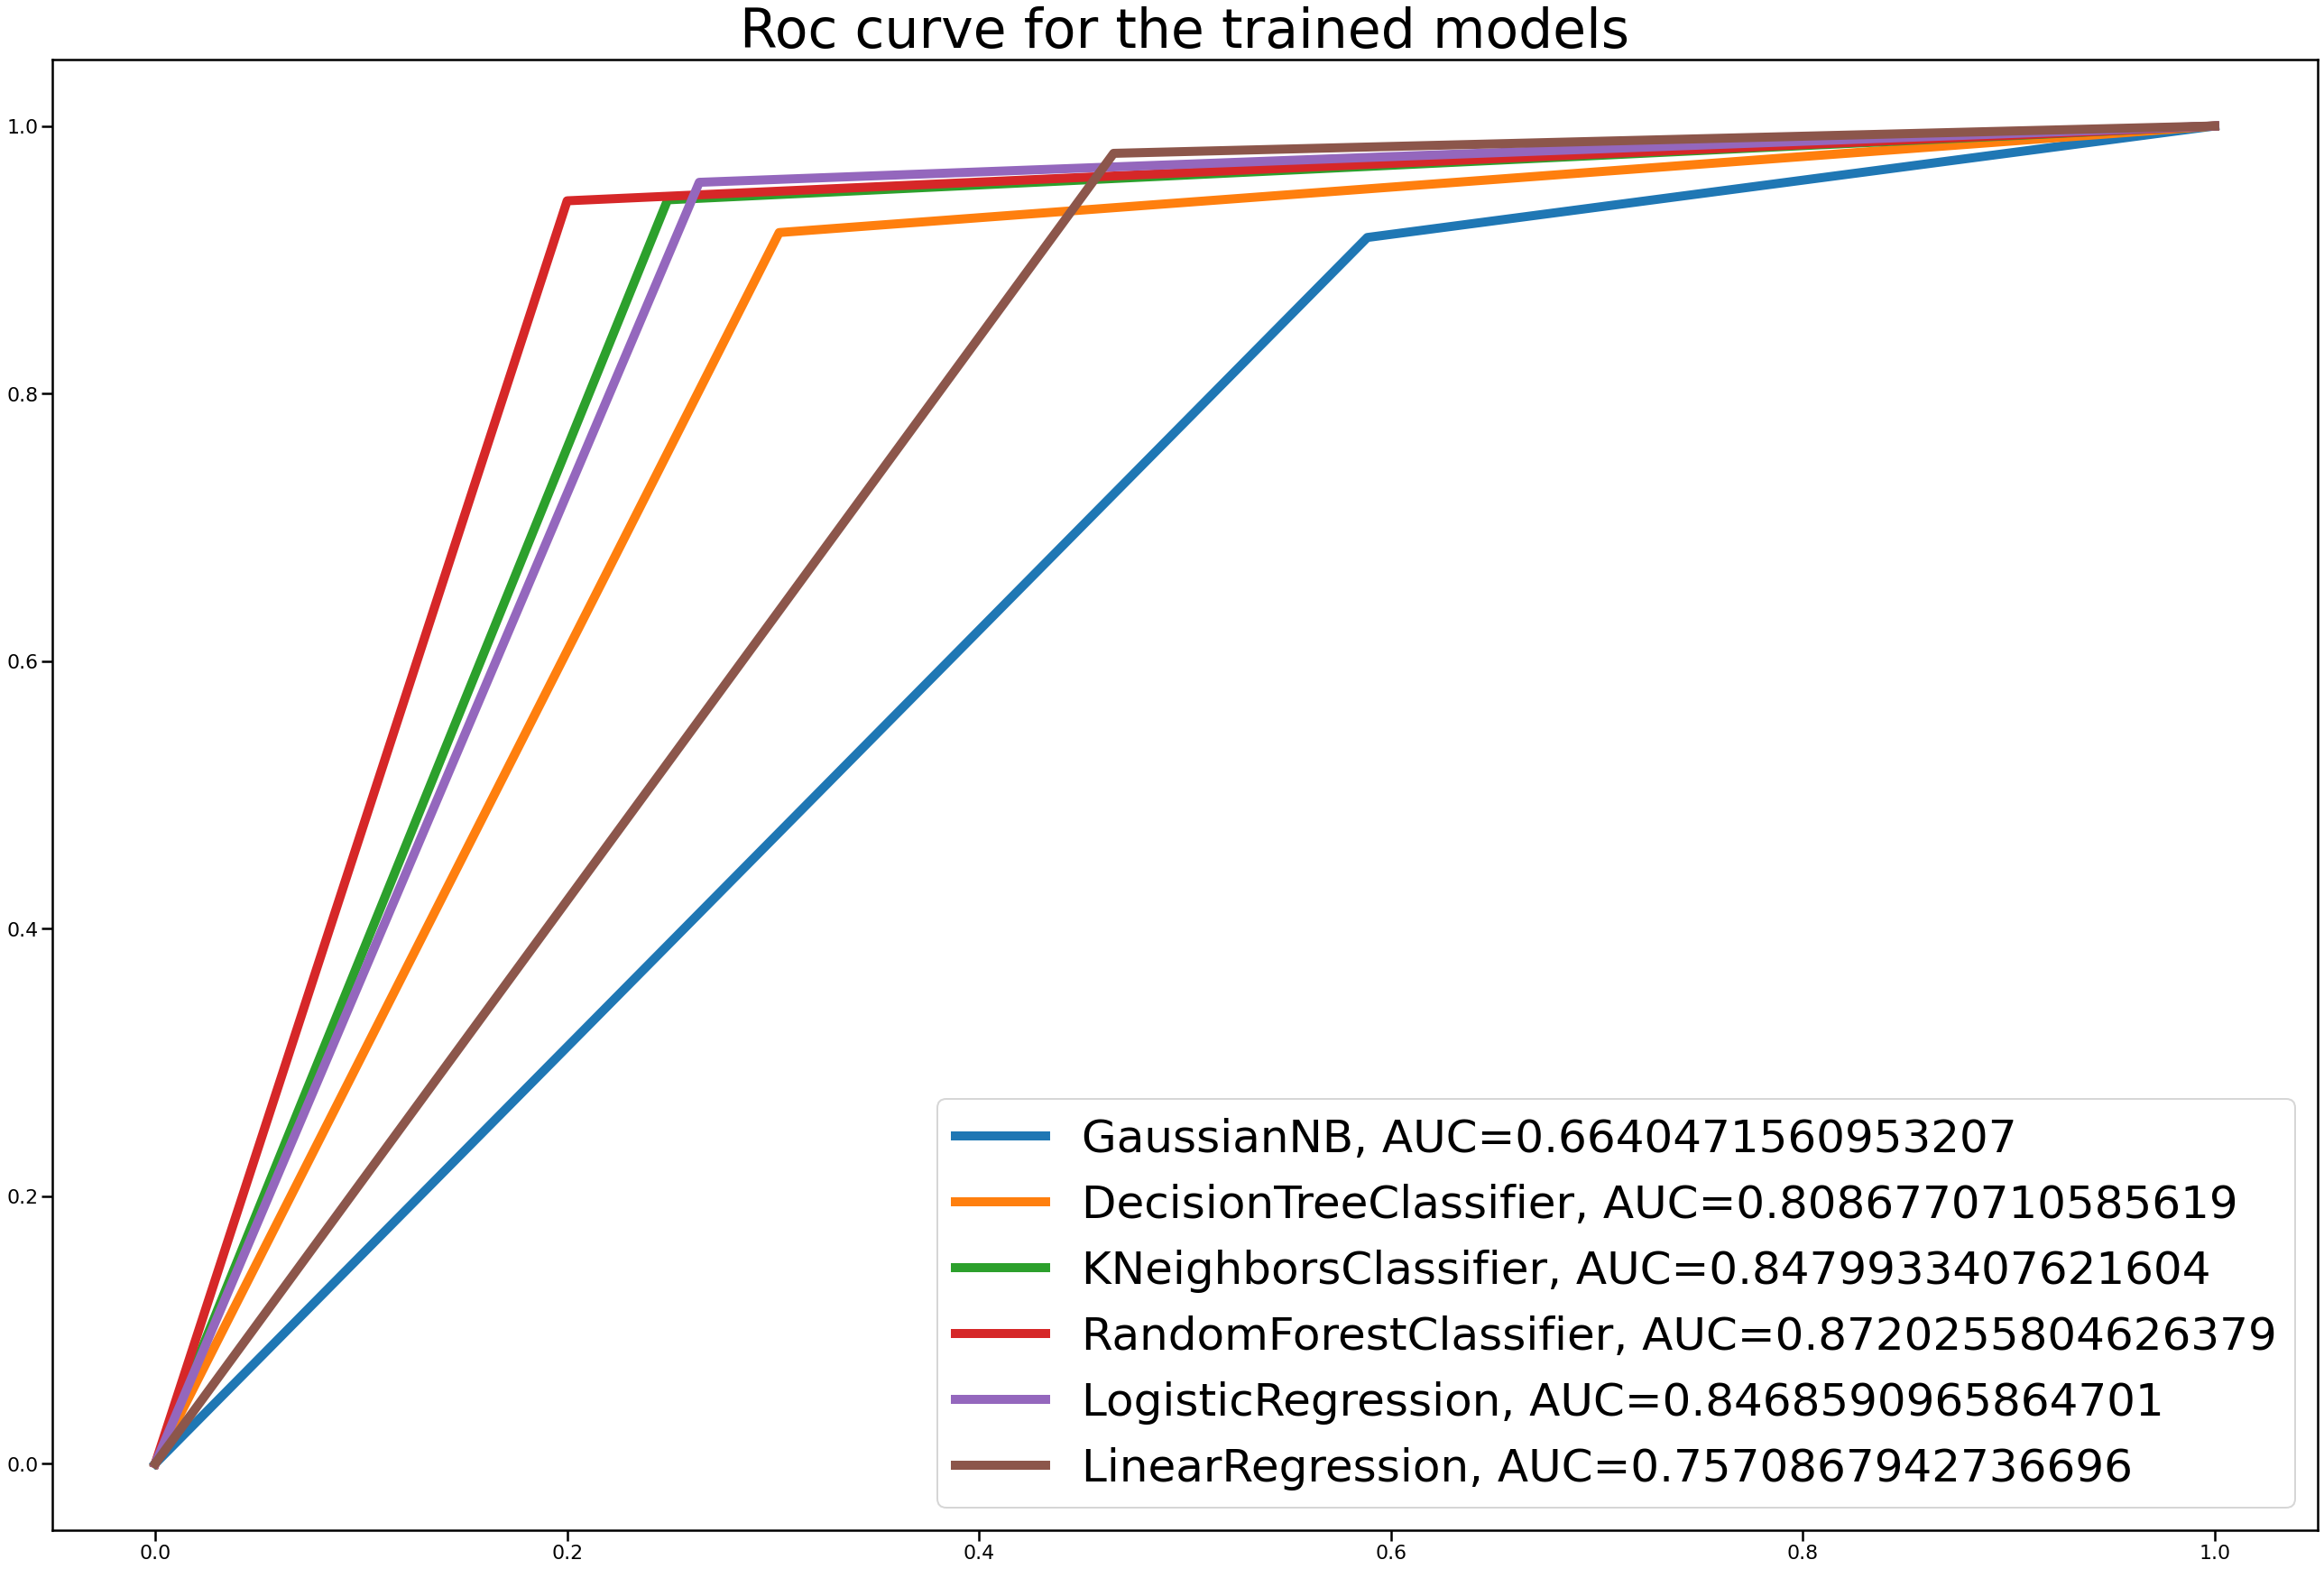

In [ ]:
plt.figure(figsize=(45, 30))
sns.set_context('poster')
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred)
auc = metrics.roc_auc_score(Y_test, Y_pred)
plt.plot(fpr,tpr,label="GaussianNB, AUC="+str(auc),linewidth=10)


fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred2)
auc = metrics.roc_auc_score(Y_test, Y_pred2)
plt.plot(fpr,tpr,label="DecisionTreeClassifier, AUC="+str(auc),linewidth=10,)


fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred3)
auc = metrics.roc_auc_score(Y_test, Y_pred3)
plt.plot(fpr,tpr,label="KNeighborsClassifier, AUC="+str(auc),linewidth=10)


fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred4)
auc = metrics.roc_auc_score(Y_test, Y_pred4)
plt.plot(fpr,tpr,label="RandomForestClassifier, AUC="+str(auc),linewidth=10)


fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred5)
auc = metrics.roc_auc_score(Y_test, Y_pred5)
plt.plot(fpr,tpr,label="LogisticRegression, AUC="+str(auc),linewidth=10)


fpr, tpr, _ = metrics.roc_curve(Y_test,  [map_pred(i) for i in Y_pred6])
auc = metrics.roc_auc_score(Y_test, [map_pred(i) for i in Y_pred6])
plt.plot(fpr,tpr,label="LinearRegression, AUC="+str(auc),linewidth=10)

plt.title('Roc curve for the trained models',fontsize=60)
parameters = {'axes.labelsize': 60,
         'axes.titlesize': 60}
plt.rcParams.update(parameters)

#add legend
plt.legend(fontsize=50)
plt.show()